In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.ticker as mtick

warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#📌 Extracción

In [20]:
datos_url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json'

In [21]:
df = pd.read_json(datos_url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [22]:
# Flatten nested columns
for col in ['customer', 'phone', 'internet', 'account']:
    df = df.join(pd.json_normalize(df[col]))
    df = df.drop(columns=[col])

display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [28]:
df.shape

(7267, 21)

In [29]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [30]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [32]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [35]:

df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [36]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [37]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Total'].isna().sum()

np.int64(11)

In [38]:
cols_binarias = [
    'Partner','Dependents','PhoneService','PaperlessBilling',
    'OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies'
]

for col in cols_binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [39]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

In [41]:
df = df.drop(columns=['Charges.Monthly'])

#📊 Carga y análisis

In [42]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Total,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.365459,0.440380,0.438094,0.370032,0.490679,0.495251,0.593230,2280.634213,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.481601,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8684.800000,3.958333


In [43]:
df['tenure'].describe()

,tenure
count,7267.000000
mean,32.346498
std,24.571773
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [44]:
df['Charges.Total'].describe()

,Charges.Total
count,7256.000000
mean,2280.634213
std,2268.632997
min,18.800000
25%,400.225000
50%,1391.000000
75%,3785.300000
max,8684.800000


In [45]:
df['Cuentas_Diarias'].describe()

,Cuentas_Diarias
count,7267.000000
mean,2.157337
std,1.004319
min,0.608333
25%,1.180833
50%,2.343333
75%,2.995833
max,3.958333


In [46]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0.0,0.73463
1.0,0.26537


In [47]:
df['Contract'].value_counts(normalize=True)

,proportion
Contract,
Month-to-month,0.551122
Two year,0.239851
One year,0.209027


In [48]:
df['PaymentMethod'].value_counts(normalize=True)

,proportion
PaymentMethod,
Electronic check,0.336452
Mailed check,0.229118
Bank transfer (automatic),0.218660
Credit card (automatic),0.215770


In [49]:
df.groupby('Churn')[['tenure','Charges.Total','Cuentas_Diarias']].agg(
    ['mean','median','std']
)

tenure                   Charges.Total                        \
            mean median        std          mean   median          std   
Churn                                                                    
0.0    37.569965   38.0  24.113777   2555.344141  1683.60  2329.456984   
1.0    17.979133   10.0  19.531123   1531.796094   703.55  1890.822994   

      Cuentas_Diarias                    
                 mean  median       std  
Churn                                    
0.0          2.042171  2.1475  1.036422  
1.0          2.481378  2.6550  0.822202

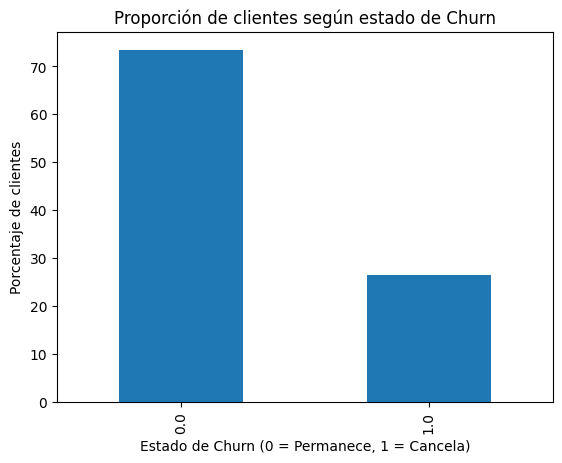

In [50]:
# Contar clientes por estado de churn
churn_counts = df['Churn'].value_counts(normalize=True) * 100

# Crear gráfico
plt.figure()
churn_counts.plot(kind='bar')

plt.title('Proporción de clientes según estado de Churn')
plt.xlabel('Estado de Churn (0 = Permanece, 1 = Cancela)')
plt.ylabel('Porcentaje de clientes')

plt.show()

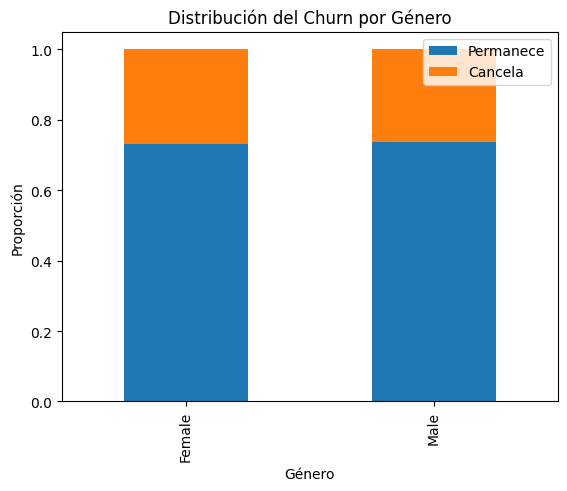

In [58]:
tabla_genero = pd.crosstab(
    df['gender'],
    df['Churn'],
    normalize='index'
).round(3)

tabla_genero

tabla_genero.plot(kind='bar', stacked=True)

plt.title('Distribución del Churn por Género')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(['Permanece', 'Cancela'])
plt.show()

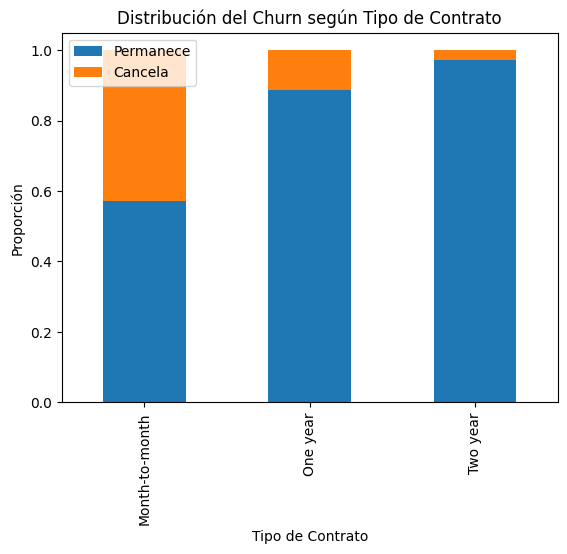

In [59]:
tabla_contrato = pd.crosstab(
    df['Contract'],
    df['Churn'],
    normalize='index'
).round(3)

tabla_contrato

tabla_contrato.plot(kind='bar', stacked=True)

plt.title('Distribución del Churn según Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporción')
plt.legend(['Permanece', 'Cancela'])
plt.show()

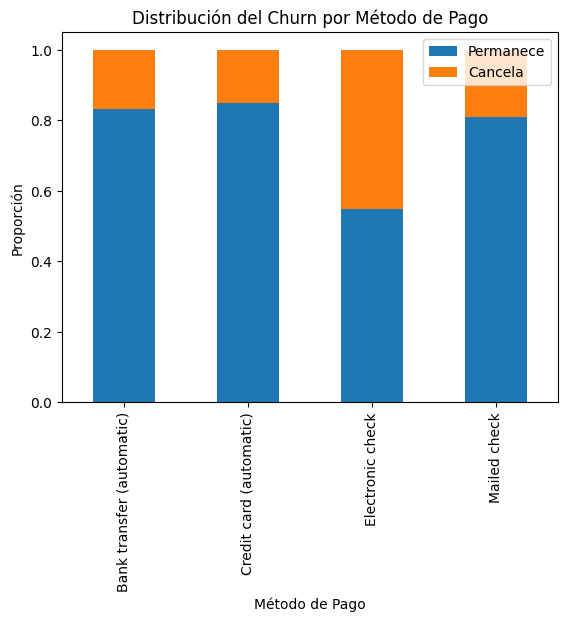

In [60]:
tabla_pago = pd.crosstab(
    df['PaymentMethod'],
    df['Churn'],
    normalize='index'
).round(3)

tabla_pago

tabla_pago.plot(kind='bar', stacked=True)

plt.title('Distribución del Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Proporción')
plt.legend(['Permanece', 'Cancela'])
plt.show()

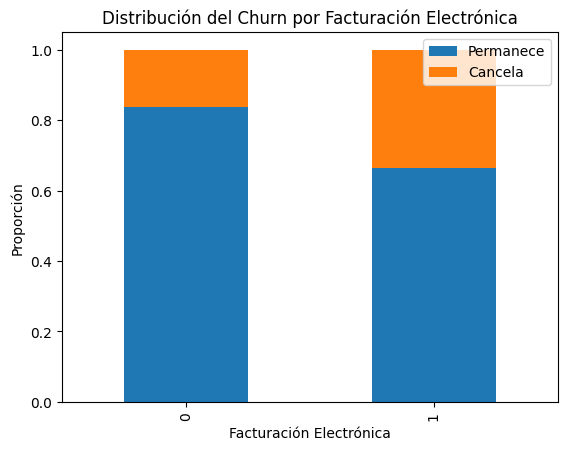

In [62]:
tabla_paperless = pd.crosstab(
    df['PaperlessBilling'],
    df['Churn'],
    normalize='index'
).round(3)

tabla_paperless

tabla_paperless.plot(kind='bar', stacked=True)

plt.title('Distribución del Churn por Facturación Electrónica')
plt.xlabel('Facturación Electrónica')
plt.ylabel('Proporción')
plt.legend(['Permanece', 'Cancela'])
plt.show()

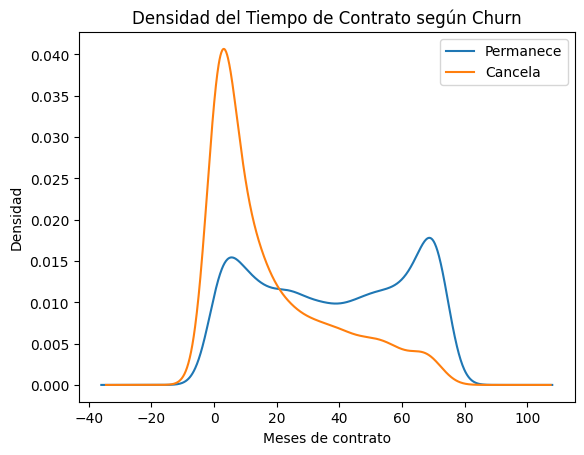

In [66]:
plt.figure()
df[df['Churn'] == 0]['tenure'].plot(kind='density')
df[df['Churn'] == 1]['tenure'].plot(kind='density')

plt.title('Densidad del Tiempo de Contrato según Churn')
plt.xlabel('Meses de contrato')
plt.ylabel('Densidad')
plt.legend(['Permanece', 'Cancela'])

plt.show()

<Figure size 640x480 with 0 Axes>

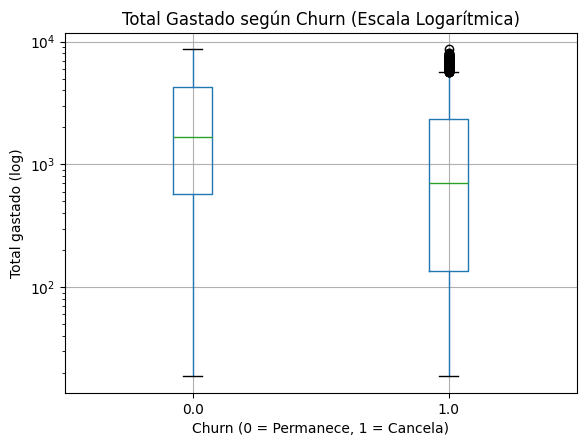

In [67]:
plt.figure()
df.boxplot(column='Charges.Total', by='Churn')

plt.yscale('log')
plt.title('Total Gastado según Churn (Escala Logarítmica)')
plt.suptitle('')
plt.xlabel('Churn (0 = Permanece, 1 = Cancela)')
plt.ylabel('Total gastado (log)')

plt.show()

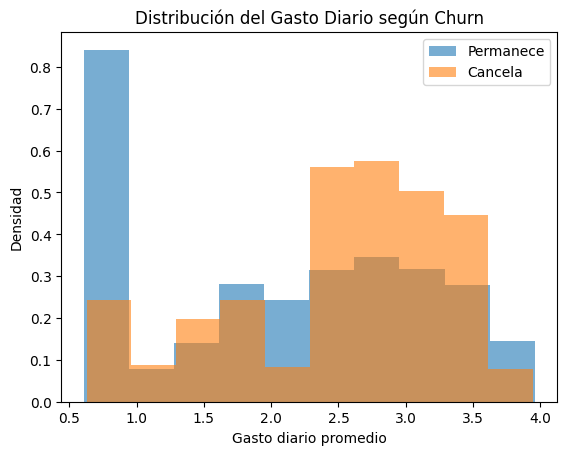

In [68]:
plt.figure()
plt.hist(
    df[df['Churn'] == 0]['Cuentas_Diarias'],
    density=True,
    alpha=0.6
)
plt.hist(
    df[df['Churn'] == 1]['Cuentas_Diarias'],
    density=True,
    alpha=0.6
)

plt.title('Distribución del Gasto Diario según Churn')
plt.xlabel('Gasto diario promedio')
plt.ylabel('Densidad')
plt.legend(['Permanece', 'Cancela'])

plt.show()

<Figure size 640x480 with 0 Axes>

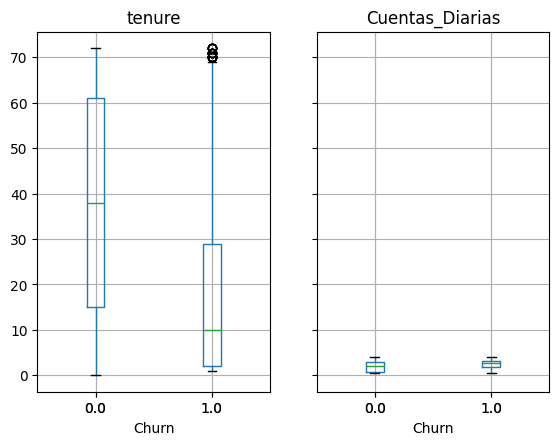

In [69]:
plt.figure()
df.boxplot(
    column=['tenure', 'Cuentas_Diarias'],
    by='Churn'
)

plt.suptitle('')
plt.show()

#📄Informe final

#Introducción:
El objetivo de este análisis es identificar los factores que influyen en la evasión de clientes(Churn) en Telecom X, con el fin de apoyar el desarrollo de modelos predictivos y estrategias de retención.

#Limpieza y tratamiento de Datos
Se eliminarion las columnas sin valor analítico, se corrigieron tipos de datos, se transformó la variable "Churn" a formato binario y se creó la variable "Cuentas_Diarias" para analizar el gasto diario promedio de los clientes.

#Analisis Exploratorio de Datos
El análisis mostró que:
-El churn es mayor en clientes con contratos mensuales.
-El método de pago manuales presentan mayor evasión.
-Los clientes con menor antigüedad y mayor gasto diario tienden a cancelar más.
-La contratación de servicios adicionales reduce la probabilidad de churn.
#Concluciones e Insights
La evasión ocurre principalmente en etapas tempranas y está asociada a contratos cortos, mayor carga económica y menor vinculación con el servicio.

#Recomendaciones
-Promover contratos de largo plazo.
-Incentivar pagos automáticos.
-Aplicar estrategias de retención temprana.
-Formentar la contratación de servicios adicionales.